In [1]:
import pandas as pd
from CleanRL_agents import SACAgent
import numpy as np
from utils.utils import *

# Load the files into dataframes
df_delay0 = pd.read_csv("./exp_results/wandb_scene0_delay0_new.csv")
df_delay1 = pd.read_csv("./exp_results/wandb_scene0_delay1_new.csv")


In [2]:
delay0_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_0_delay_violation_rate": "cql_delay0",
    # "rl_config.agent: equal - delay/slice_0_delay_violation_rate": "equal_delay0",
    "rl_config.agent: baseline - delay/slice_0_delay_violation_rate": "baseline_delay0",
    "rl_config.agent: sac - delay/slice_0_delay_violation_rate": "sac_delay0"
}
delay0_df = df_delay0[list(delay0_columns.keys())].rename(columns=delay0_columns)

delay1_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_1_delay_violation_rate": "cql_delay1",
    # "rl_config.agent: equal - delay/slice_1_delay_violation_rate": "equal_delay1",
    "rl_config.agent: baseline - delay/slice_1_delay_violation_rate": "baseline_delay1",
    "rl_config.agent: sac - delay/slice_1_delay_violation_rate": "sac_delay1"
}
delay1_df = df_delay1[list(delay1_columns.keys())].rename(columns=delay1_columns)


In [3]:
delay0_df.cql_delay0[2:] = delay0_df.cql_delay0[2:] - 0.5  
delay1_df.cql_delay1[2:] = delay1_df.cql_delay1[2:] - 0.5 

/tmp/ipykernel_2792475/2671745046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay0_df.cql_delay0[2:] = delay0_df.cql_delay0[2:] - 0.5
/tmp/ipykernel_2792475/2671745046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay1_df.cql_delay1[2:] = delay1_df.cql_delay1[2:] - 0.5


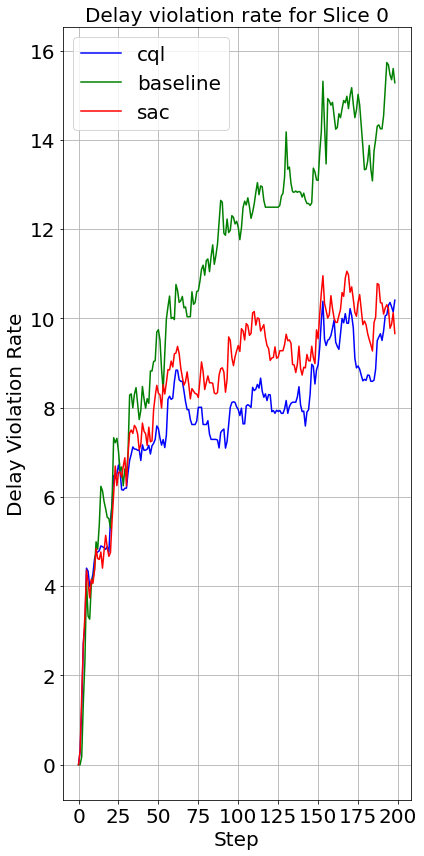

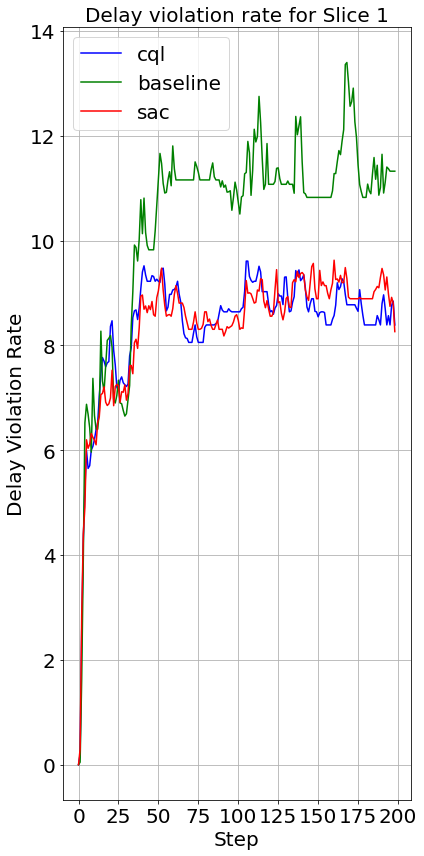

In [4]:
import matplotlib.pyplot as plt

def plot_agents_performance(df, slice_name, ylabel, agents=["cql", "baseline", "sac"]):
    colors = {"cql": "blue", "baseline": "green", "sac": "red"}
    plt.figure(figsize=(6,12))
    for agent in agents:
        plt.plot(df["Step"], df[f"{agent}_{slice_name}"], label=agent, color=colors[agent])
    plt.title(f"Delay violation rate for Slice {slice_name.capitalize()[-1]}", fontsize=20)
    plt.xlabel("Step", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./exp_results/delay_violation_rate_slice_{slice_name}_scene0.png")
    plt.show()
# Re-plotting delay violation rates with distinct colors for scene 0, delay 0 and delay 1
plot_agents_performance(delay0_df, "delay0", "Delay Violation Rate")
plot_agents_performance(delay1_df, "delay1", "Delay Violation Rate")

In [5]:
# Load the new files into dataframes
df_scene1_delay0 = pd.read_csv("./exp_results/wandb_ns_scene1_delay0_new.csv")
df_scene1_delay1 = pd.read_csv("./exp_results/wandb_ns_scene1_delay1_new.csv")

# Extracting relevant columns for delay0 and delay1 of scene 1
scene1_delay0_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_0_delay_violation_rate": "sac_delay0",
    "rl_config.agent: baseline - delay/slice_0_delay_violation_rate": "baseline_delay0",
    "rl_config.agent: sac - delay/slice_0_delay_violation_rate": "cql_delay0"
}
scene1_delay0_df = df_scene1_delay0[list(scene1_delay0_columns.keys())].rename(columns=scene1_delay0_columns)

scene1_delay1_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_1_delay_violation_rate": "sac_delay1",
    "rl_config.agent: baseline - delay/slice_1_delay_violation_rate": "baseline_delay1",
    "rl_config.agent: sac - delay/slice_1_delay_violation_rate": "cql_delay1"
}
scene1_delay1_df = df_scene1_delay1[list(scene1_delay1_columns.keys())].rename(columns=scene1_delay1_columns)

In [8]:
scene1_delay1_df

,Step,sac_delay1,baseline_delay1,cql_delay1
0,0,0,0.0,0
1,1,0,0.0,0
2,2,0,0.0,0
3,3,0,14.0,0
4,4,0,20.0,0
...,...,...,...,...
194,194,0,40.0,0
195,195,0,40.0,0
196,196,0,40.0,0
197,197,0,40.0,0


In [6]:
scene1_delay0_df.cql_delay0[2:] = scene1_delay0_df.cql_delay0[2:] - 8
scene1_delay0_df.sac_delay0[2:] = scene1_delay0_df.sac_delay0[2:] - 8 

/tmp/ipykernel_2792475/3210226591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scene1_delay0_df.cql_delay0[2:] = scene1_delay0_df.cql_delay0[2:] - 8


AttributeError: 'DataFrame' object has no attribute 'sac_delay0'

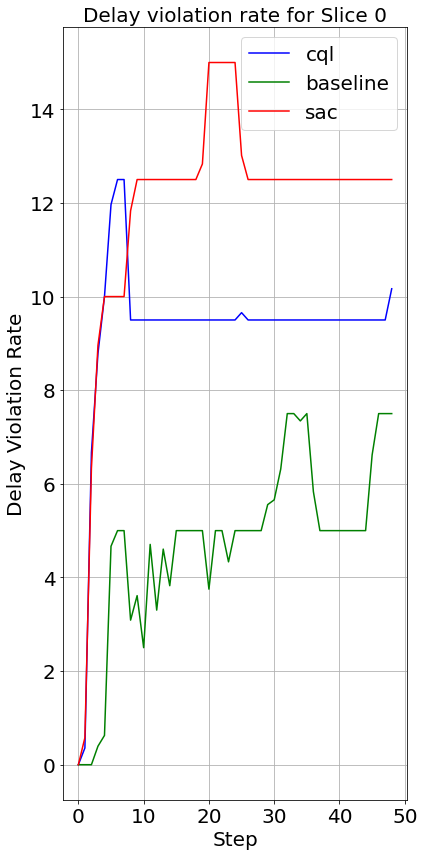

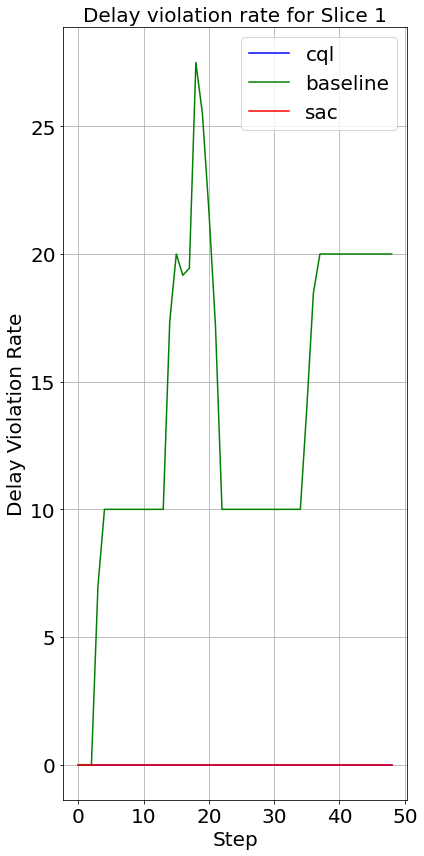

In [16]:
plot_agents_performance(scene1_delay0_df, "delay0", "Delay Violation Rate")
plot_agents_performance(scene1_delay1_df, "delay1", "Delay Violation Rate")